# Importation d'un fichier de données et faire une analyse bivariée

<div class="alert alert-block alert-info">
    <b>Nous allons pour l'instant importer un fichier .cvs  </b> 

<div class="alert alert-block alert-info">

Il est possible de créer une `DataFrame` à partir d'un fichier excel, csv, json, sql, stata ... Dans la cellule ci-dessous, écrire `pd.read` puis presser plusieurs fois la touche tabulation. Un ensemble de fonction de type `pd.read_XXX` s'affiche dans un menu déroulant. Choisir une méthode en faisant entrée ou en cliquant dessus et ajouter un point d'interrogation pour voir comment elle fonctionne.

***



Nous devons importer les librairies `pandas` et `numpy.`

In [1]:
import pandas as pd 
import  numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
# os.chdir('C:/Users/peron/Documents/Travail/Enseignement/NoteBooks/NoteBooksPY')

In [2]:
print('\033[1m'+'\033[93m',os.getcwd())

 C:\Users\peron\Documents\Travail\Enseignement\MasterCEEM\Stat2\2023-2024\NoteBooksPY


In [3]:
#pd.read    # mettez vous à la fin de "read" et appuyer sur Tab

<div class="alert alert-success">

Regarder l'aide `pd.read_csv`. Aide assez longue....
</div>

Les fonctions `read_csv()` ou `read_excel()` présentent de nombreux arguments (paramètres) leur permettant de lire de façon souple, les fichiers excel ou csv.

En particulier, les paramètres suivants sont importants :
* `filepath_or_buffer` : le nom, le chemin ou une url vers le fichier à lire
* `sep` : le caractère utilisé pour séparer les colonnes dans le fichier, habituellement `","`, `";"` ou un espace (voir `delim_whitespace` dans ce cas).
* `index_col` : le numéro de la colonne a utiliser en tant qu'index
* `decimal` : indique le caractère utilisé pour les nombres décimaux. Par défaut c'est un ., mais si le fichier a été créé par un tableur en français, les nombres décimaux peuvent être écrit avec une vigule. Il faut alors préciser `decimal=","`.
* `usecols` : les numéros de colonnes à lire
* `encoding` : précise l'encodage du fichier. Les plus courants sont `"utf-8"` ou `"latin1"` (sous windows).

Dans le cas de la lecture d'un fichier excel, `sheet_name` vous permet de sélectionner la feuille du classeur à lire, en indiquant son nom ou son numéro.

Prennez le temps de lire la documentation de ces fonctions pour apprécier les possibilités qu'elles offrent.

Ci-dessous, voici un exemple de la lecture de ce fichier. Dans l'exemple ci-dessous, il se trouve dans le dossier `Donnee/`.

In [4]:
df=pd.read_csv("Donnees/Resultat_permis.csv", sep=";", index_col=0, encoding="latin1") #### sans le latin1 cela ne peut le lire en raison des accents
df.head()

,Conduite accomp,Nombre heures AE,Sexe,Age,Auto-ecole,Resultat
Candidat,,,,,,
E0001,Non,33,G,19,Blizz,Recalé
E0002,Non,26,G,18,Conduc,Recalé
E0003,Oui,21,F,18,Vincent,Admis
E0004,Non,27,F,20,Conduc,Recalé
E0005,Oui,21,F,18,Christian,Recalé


Avec une fichier Excel :

In [5]:
df2=pd.read_excel("Donnees/Resultat_permis.xls", sheet_name="Feuil1",
    usecols=(0,1, 2, 3, 4, 5, 6),index_col=0)
df2.head()

,Conduite accomp,Nombre heures AE,Sexe,Age,Auto-ecole,Resultat
Candidat,,,,,,
E0001,Non,33,G,19,Blizz,Recalé
E0002,Non,26,G,18,Conduc,Recalé
E0003,Oui,21,F,18,Vincent,Admis
E0004,Non,27,F,20,Conduc,Recalé
E0005,Oui,21,F,18,Christian,Recalé


### Résumé du Data Fame

<font color="#800080">Dimension, intitulé des colonnes</font>.

In [48]:
df.shape

1233

In [7]:
df.columns

Index(['Conduite accomp', 'Nombre heures AE', 'Sexe', 'Age', 'Auto-ecole',
       'Resultat'],
      dtype='object')

In [8]:
list(df.columns) 

['Conduite accomp',
 'Nombre heures AE',
 'Sexe',
 'Age',
 'Auto-ecole',
 'Resultat']

<font color="#800080">Modalités d'une variable qualitative </font>.

In [9]:
df['Sexe'].unique()

array(['G', 'F'], dtype=object)

In [10]:
df['Auto-ecole'].unique()

array(['Blizz', 'Conduc', 'Vincent', 'Christian', 'Pilote', 'Mireille'],
      dtype=object)

In [11]:
pd.unique(df['Auto-ecole'])

array(['Blizz', 'Conduc', 'Vincent', 'Christian', 'Pilote', 'Mireille'],
      dtype=object)

<font color="#800080">Statistiques</font>.

In [12]:
df.describe()

,Nombre heures AE,Age
count,1233.000000,1233.000000
mean,23.939984,19.275750
std,3.621450,3.324965
min,20.000000,18.000000
25%,21.000000,18.000000
50%,23.000000,19.000000
75%,25.000000,19.000000
max,46.000000,62.000000


In [13]:
np.percentile(df['Nombre heures AE'],95)

30.0

In [14]:
df.describe(percentiles=[0.1,0.15,0.60,0.9])

,Nombre heures AE,Age
count,1233.000000,1233.000000
mean,23.939984,19.275750
std,3.621450,3.324965
min,20.000000,18.000000
10%,20.000000,18.000000
15%,21.000000,18.000000
50%,23.000000,19.000000
60%,24.000000,19.000000
90%,28.000000,20.000000
max,46.000000,62.000000


In [15]:
df.describe(include='O')  # Quelques résultats pour les var qualitatives

,Conduite accomp,Sexe,Auto-ecole,Resultat
count,1233,1233,1233,1233
unique,2,2,6,2
top,Non,G,Pilote,Admis
freq,660,653,245,672


In [16]:
df['Resultat'].value_counts()

Resultat
Admis     672
Recalé    561
Name: count, dtype: int64

In [17]:
df['Resultat'].value_counts(normalize=True)

Resultat
Admis     0.545012
Recalé    0.454988
Name: proportion, dtype: float64

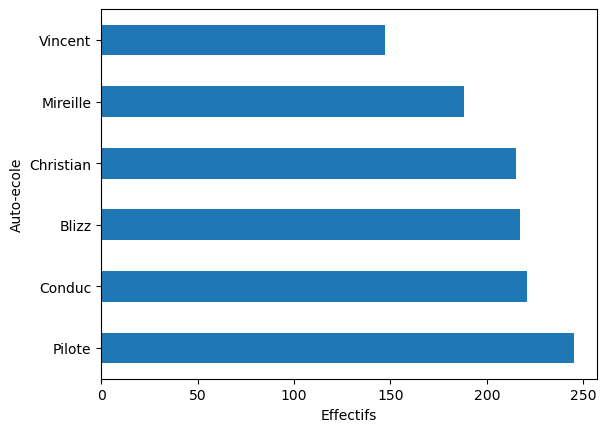

In [18]:
df['Auto-ecole'].value_counts().plot(kind="barh")
plt.xlabel("Effectifs")
plt.show()

<div class="alert alert-success">

Regarder l'aide `df.plot`.
</div>

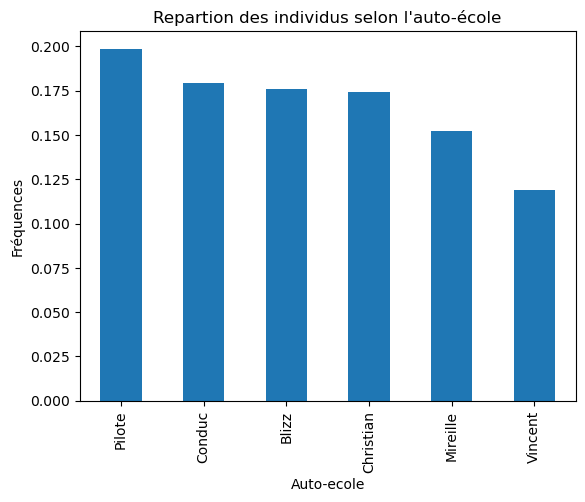

In [19]:
freq_Auto=df['Auto-ecole'].value_counts(normalize=True)
freq_Auto.plot(kind="bar", title="Repartion des individus selon l'auto-école", ylabel="Fréquences")
plt.show()

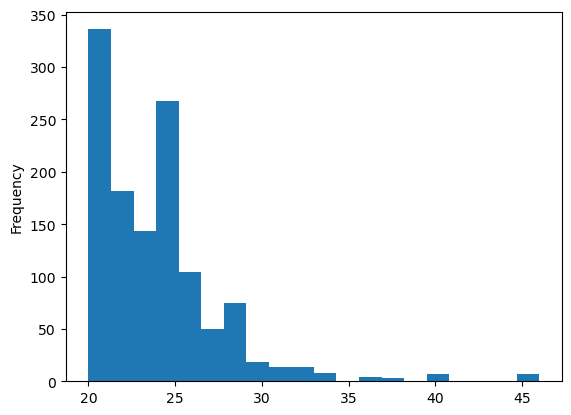

In [20]:
df['Nombre heures AE'].plot(kind="hist",bins=20)
plt.show()

<font color="#c70923"><strong> On a vu précédemment d'autres graphiques qu'il faudra utiliser  </strong></font>

# Analyse bivariées

Nous avons une variable importante, le résultat au pemis, une variable qualitative. Notre but est de voir la relation avec les autres variables.

Deux cas de figures : 

    - Relation entre  deux variables qualitatives : Tableau de contingence, Frequences conditionnelles, test du khi-2 dans le cas d'un échantillon.
    - Relation entre une variable qualitative et une variable quantitative : Comparaison de distribution, Boxplot, ANOVA dans le cas d'un échantillon.

## Deux variables qualitatives

**<font color="#800080">Relation entre Resultat au permis et Sexe</font>.**

**<font color=" #1a09c7 ">Tableau de contingence </font>.**

In [21]:
tab1=pd.crosstab(df['Sexe'], df["Resultat"])
tab1


Resultat,Admis,Recalé
Sexe,,
F,315,265
G,357,296


In [22]:
tab2=pd.crosstab(df['Sexe'], df["Resultat"],normalize='index')
tab2

Resultat,Admis,Recalé
Sexe,,
F,0.543103,0.456897
G,0.546708,0.453292


In [23]:
tab3=pd.crosstab(df['Sexe'], df["Resultat"],normalize='columns')
tab3

Resultat,Admis,Recalé
Sexe,,
F,0.46875,0.472371
G,0.53125,0.527629


**C'est la tab2 qui est la plus intéressante puisqu'il est possible de voir la répartition des résultats conditionnés au Sexe.**

In [24]:
round(100*tab2,2)

Resultat,Admis,Recalé
Sexe,,
F,54.31,45.69
G,54.67,45.33


<div class="alert alert-success">

**Exercice :** Faire les tableaux de contingence et les fréquences entre Résultats et Auto-Ecole, et entre Resutats et Conduite Accompagnée.
</div>

**<font color=" #1a09c7 ">Test d'indépendance </font>.**

Nous allons importé une fonction de la library [Scipy](https://docs.scipy.org/doc/scipy/reference/main_namespace.html#) et de sont package [Scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

Cette fonction est `chi2_contingency`.

In [25]:
from scipy.stats import chi2_contingency

<div class="alert alert-success">

Regarder l'aide `chi2_contingency`.
</div>

In [26]:
#chi2_contingency?

In [27]:
chi2_contingency(tab1)  ## Difficile à comprendre !

(0.004838083692392125,
 0.9445467926067196,
 1,
 array([[316.10705596, 263.89294404],
        [355.89294404, 297.10705596]]))

In [28]:
chi2_contingency(tab1)[0] # Valeur de la statistique du Khi-2

0.004838083692392125

In [29]:
chi2_contingency(tab1)[1] # La p-value associé au test

0.9445467926067196

In [30]:
chi2_contingency(tab1)[2]  # lenombre de degré de liberté

1

In [31]:
chi2_contingency(tab1)[3]  # Les effectifs attendus en cas d'indépendance

array([[316.10705596, 263.89294404],
       [355.89294404, 297.10705596]])

In [32]:
tab1-chi2_contingency(tab1)[3]  # les écarts entre les effectifs observés et les effecifs attendus en cas d'indépendance

Resultat,Admis,Recalé
Sexe,,
F,-1.107056,1.107056
G,1.107056,-1.107056


In [33]:
(tab1-chi2_contingency(tab1)[3])/np.sqrt(chi2_contingency(tab1)[3])  # les résidus de pearson

Resultat,Admis,Recalé
Sexe,,
F,-0.062266,0.068148
G,0.058683,-0.064226


<div class="alert alert-success">

**Exercice :** Faire ce test entre Résultats et Auto-Ecole, et entre Resutats et Conduite Accompagnée.
</div>

**Generalement pour les tableaux de contingence 2*2 on devrait utiliser le test du Fisher**

In [34]:
from scipy.stats import fisher_exact

In [35]:
fisher_exact(tab1)[1]

0.908875302434766

## Une variable qualitative et une variable quantitative

**<font color="#800080">Séparation des données selon les modalités de la variable qualitative </font>.**


Nous allons utiliser la méthode `.groupby` qui permet  de séparer les données selon les modalités d'une variable qualitative.

In [36]:
df_result=df.groupby("Resultat")
df_result.describe()

Nombre heures AE                                                     \
                    count       mean       std   min   25%   50%   75%   max   
Resultat                                                                       
Admis               672.0  23.760417  3.178361  20.0  21.0  23.0  25.0  40.0   
Recalé              561.0  24.155080  4.082084  20.0  21.0  23.0  26.0  46.0   

            Age                                                     
          count       mean       std   min   25%   50%   75%   max  
Resultat                                                            
Admis     672.0  19.074405  1.778443  18.0  18.0  19.0  19.0  30.0  
Recalé    561.0  19.516934  4.519420  18.0  18.0  19.0  20.0  62.0

**Ceci nous permet de voir les différentes caractéristiques de distribution de var qant. selon les modalités de la var. Qual.**

In [37]:
df_result_age=df.groupby("Resultat")["Age"]

In [38]:
df_result_age.describe()

,count,mean,std,min,25%,50%,75%,max
Resultat,,,,,,,,
Admis,672.0,19.074405,1.778443,18.0,18.0,19.0,19.0,30.0
Recalé,561.0,19.516934,4.519420,18.0,18.0,19.0,20.0,62.0


In [39]:
df_result_age.agg(["mean", "std", "min", "max"])

,mean,std,min,max
Resultat,,,,
Admis,19.074405,1.778443,18,30
Recalé,19.516934,4.519420,18,62


In [40]:
df.groupby(["Auto-ecole", "Resultat"])['Nombre heures AE'].mean()  # on peut selectionner selon plusieurs var. qual.

Auto-ecole  Resultat
Blizz       Admis       24.863014
            Recalé      25.659722
Christian   Admis       23.701031
            Recalé      24.161017
Conduc      Admis       24.255814
            Recalé      23.739130
Mireille    Admis       23.747899
            Recalé      23.753623
Pilote      Admis       23.649682
            Recalé      23.181818
Vincent     Admis       22.525773
            Recalé      22.840000
Name: Nombre heures AE, dtype: float64

<div class="alert alert-success">

**Exercice :** Faire les statistiques descriptives de l'âge selon le resultat et le sexe.
</div>

Il est possible de faire d'appliquer de fonctions sur les données avec `apply`. **Il s'agit de fonction dites "lambda".**

On veut avoir l'étendue du nombre d'heures à l'auto-école selon l'auto école.

In [41]:
df.groupby("Auto-ecole")['Nombre heures AE'].apply(lambda x : x.max()-x.min())

Auto-ecole
Blizz        26
Christian    20
Conduc       17
Mireille     13
Pilote       13
Vincent      11
Name: Nombre heures AE, dtype: int64

In [42]:
df.groupby("Auto-ecole")['Nombre heures AE'].describe()   ## Pour vérifier l'exactitude de l'instruction précédente.

,count,mean,std,min,25%,50%,75%,max
Auto-ecole,,,,,,,,
Blizz,217.0,25.391705,4.662550,20.0,22.0,25.0,27.0,46.0
Christian,215.0,23.953488,3.900356,20.0,21.0,23.0,25.0,40.0
Conduc,221.0,24.040724,3.488053,20.0,21.0,23.0,26.0,37.0
Mireille,188.0,23.750000,2.928059,20.0,21.0,23.0,25.0,33.0
Pilote,245.0,23.481633,3.002163,20.0,21.0,23.0,25.0,33.0
Vincent,147.0,22.632653,2.561789,20.0,21.0,22.0,24.0,31.0


**<font color="#800080">Les boxplots </font>.**

Afin de faire ces boxplot, nous allons utiliser deux librairies très importantes pour la data visualisation `matplotlib` et `seaborn`.

La documentation en anglais est ici : [matplotlib](https://matplotlib.org/stable/), [seaborn](https://seaborn.pydata.org/)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

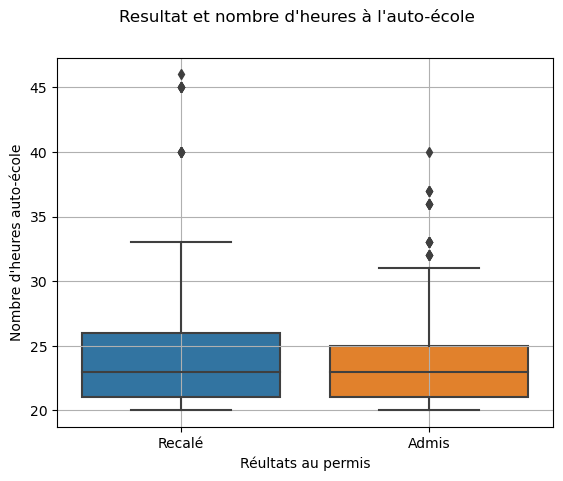

In [44]:
sns.boxplot(data=df, x="Resultat", y='Nombre heures AE')

# nom des axes
plt.xlabel("Réultats au permis")
plt.ylabel("Nombre d'heures auto-école")
# titre et sous-titre
plt.suptitle("Resultat et nombre d'heures à l'auto-école")
# grille
plt.grid()
# Sauvegarder le graphique 
# plt.savefig("Boxplot1.png")


**<font color="#800080">Faire une ANOVA</font>.**

Nous allons utiliser une librairie `statsmodels`.
Docuentation : [statsmodels](https://www.statsmodels.org/stable/index.html).

Nous allons voir si la moyenne de  l'àge est identique selon le résultat.



In [45]:
df.groupby("Resultat")["Age"].mean()

Resultat
Admis     19.074405
Recalé    19.516934
Name: Age, dtype: float64

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Age ~ Resultat', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df         F    PR(>F)
Resultat     59.876043     1.0  5.435502  0.019892
Residual  13560.368888  1231.0       NaN       NaN


**Calcul du rapport de corrélation**

In [67]:
def rap_cor(table_anova,n) :
    VM=table_anova['sum_sq'][0]
    MV=table_anova['sum_sq'][1]
    rap_cor=round((VM/(VM+MV))**0.5,3)
    return rap_cor

In [68]:
n=df.shape[0]
rap_cor(anova_table,n)

0.066

<div class="alert alert-success">

**Exercice :** Faire la même chose entre les résultats et le nombre d'heures à l'auto-école.
</div>

<div class="alert alert-success">

**Exercice :** Faire un notebook avec les analyses statistiques et les commentaires concernant le fichier pourboire.
</div>

<div class="alert alert-success">

**Exercice :** Faire une fonction qui calcule le coefficient de Cramer pour deux variables qualitatives
</div>